# **시계열 분석 (Time Series Analysis)**

시계열 분석은 시간 순서대로 배열된 포인트에서 의미 있는 요약 및 통계 정보를 추출하는 작업입니다.

Time series analysis is the endeavor of extracting meaningful summary and statistical information from points arranged in chronological order.

https://www.oreilly.com/library/view/practical-time-series/9781492041641/

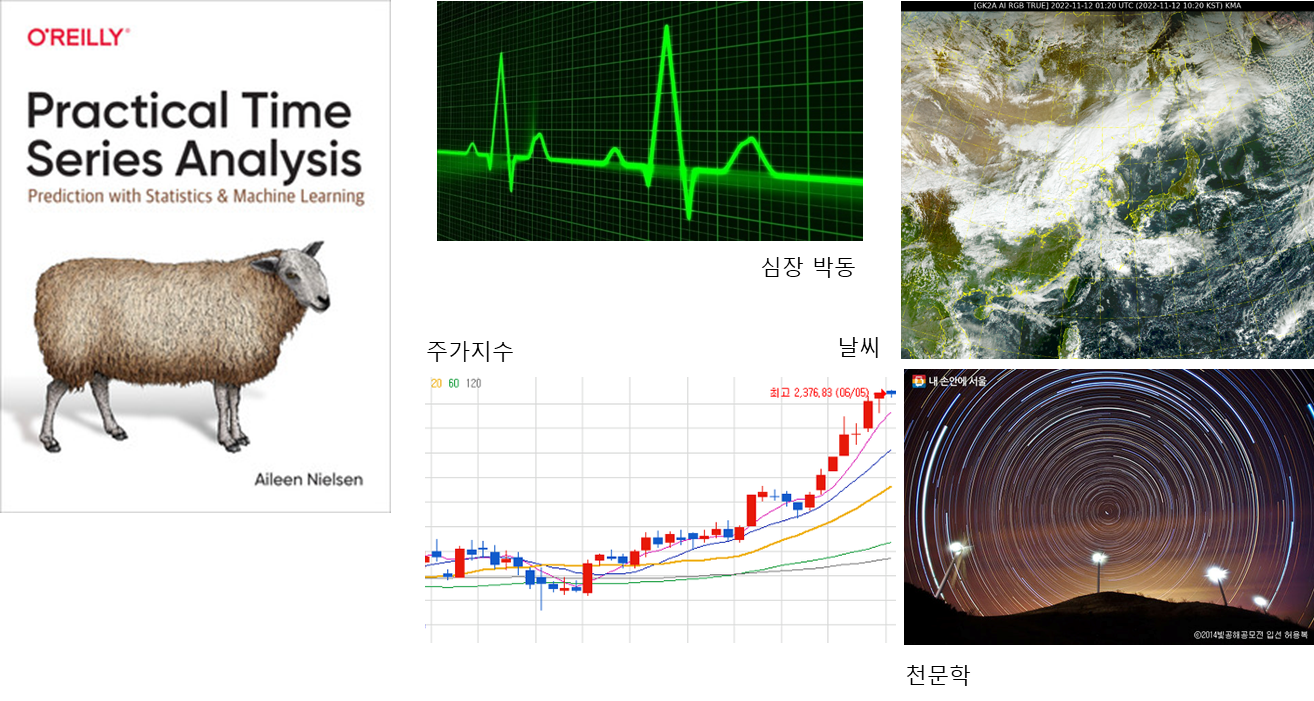

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets

# **백색 잡음**

In [ ]:
#백색 잡음 (White Noise Process)

data = np.random.normal(0, 1, 100)

plt.plot(data)
plt.axhline(0, 0, 100, color='red', linestyle='--')
plt.show()

# **확률보행과정**

In [ ]:
#확률보행과정 (Random Walr Process)

data = np.array([0])

for i in range(99):
  data = np.append(data, data[-1] + np.random.normal(0, 1, 1))

plt.plot(data)
plt.axhline(0, 0, 100, color='red', linestyle='--')
plt.show()

# **정상 확률 과정**

In [ ]:
#정상 확률 과정 (Stationary Proecess)

data = np.array([0])
A_corr = 0.5

for i in range(99):
  data = np.append(data, data[-1] * A_corr + np.random.normal(0, 1, 1))

plt.plot(data)
plt.axhline(0, 0, 100, color='red', linestyle='--')
plt.show()

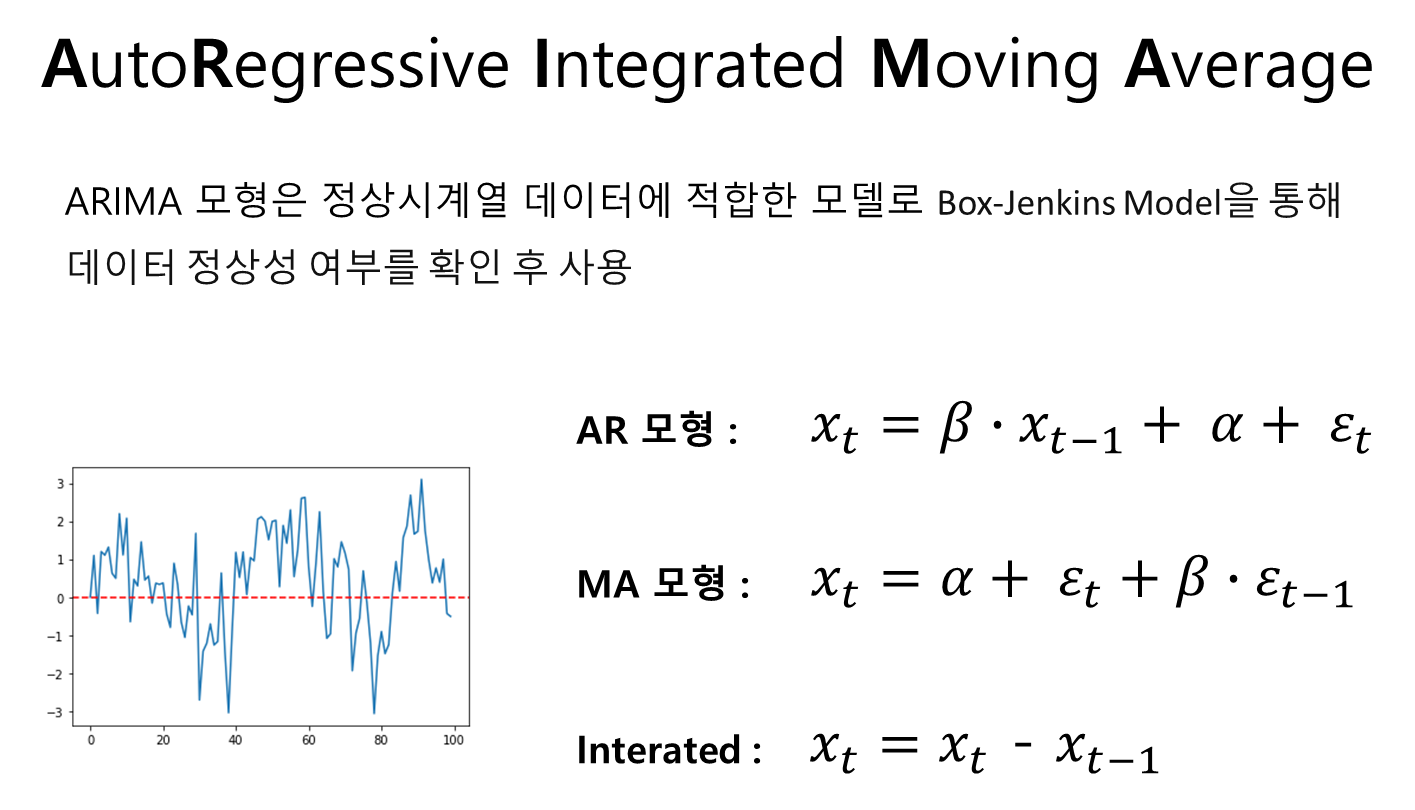

In [ ]:
# prompt: data라는 numpy 배열에 있는 데이터의 box-jenkins model의 정상성에 해당하는지 검토하는 코드

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    """
    Checks the stationarity of a time series using the Augmented Dickey-Fuller test.

    Args:
      data: A NumPy array representing the time series data.

    Returns:
      A dictionary containing the test results, including the ADF statistic, p-value,
      and critical values. Also prints a summary of the test results.
    """

    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("The time series is likely stationary.")
    else:
        print("The time series is likely non-stationary.")

    return result

# Perform the stationarity test
results = check_stationarity(data)

In [ ]:
# prompt: data 라는 numpy에 있는 데이터로 ARIMA 분석하는 코드
from statsmodels.tsa.arima.model import ARIMA

# Example ARIMA model fitting (adjust order as needed)
try:
    # Assuming 'data' is a numpy array
    model = ARIMA(data, order=(3, 1, 3))  # Example order (p, d, q)
    model_fit = model.fit()
    print(model_fit.summary())

    # Make predictions
    start = len(data) - 20  # Define starting point of prediction
    end = len(data) + 20    # Define ending point of prediction
    predictions = model_fit.predict(start=start, end=end, typ='levels')  # typ='levels' for differenced data

    # Plot the data and predictions
    plt.plot(data, label='Original Data')
    plt.plot(range(start, end + 1), predictions, color='red', label='Predictions')  # Align the prediction range
    plt.legend()
    plt.show()
except Exception as e:
    print(f"An error occurred during ARIMA modeling: {e}")
    print("Try adjusting the ARIMA order parameters (p, d, q).")

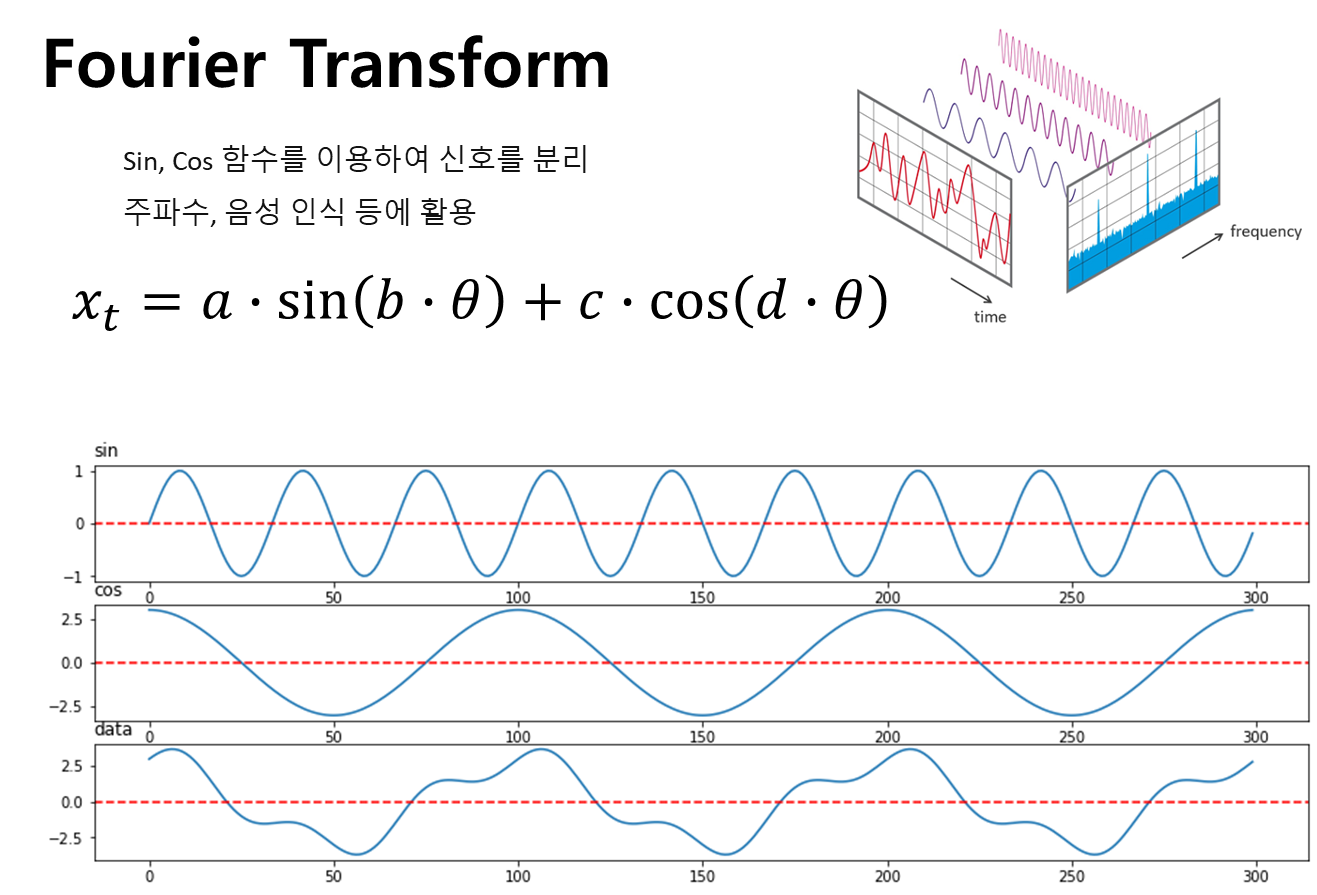

In [ ]:
#푸리에 신호

def display_signal(sin_w=1, sin_b=1, cos_w = 1, cos_b = 1):
  t = np.arange(0, 3, 1 / 100)
  sin = sin_w * np.sin(2 * np.pi * sin_b * t)
  cos = cos_w * np.cos(2 * np.pi * cos_b * t)
  data = sin + cos

  fig = plt.figure(figsize=(15,6))
  ax = fig.add_subplot(3,1,1)
  ax.plot(sin)
  ax.set_ylim(-10, 10)  # Set y-axis range
  plt.title('sin', loc='left')
  ax.axhline(0, 0, 100, color='red', linestyle='--')

  ax = fig.add_subplot(3,1,2)
  ax.plot(cos)
  ax.set_ylim(-10, 10)  # Set y-axis range
  plt.title('cos', loc='left')
  ax.axhline(0, 0, 100, color='red', linestyle='--')

  # Data plot with custom background and line color
  ax = fig.add_subplot(3, 1, 3)
  ax.set_facecolor('#ffe6e6')  # Light red background
  ax.plot(data, color='red')  # Red line for data
  ax.set_ylim(-10, 10)  # Set y-axis range
  plt.title('data', loc='left')
  ax.axhline(0, color='red', linestyle='--')

  plt.show()


ipywidgets.interact(display_signal, sin_w = (0, 5, 1), sin_b = (0, 10, 1), cos_w = (0, 5, 1), cos_b = (0, 10, 1))

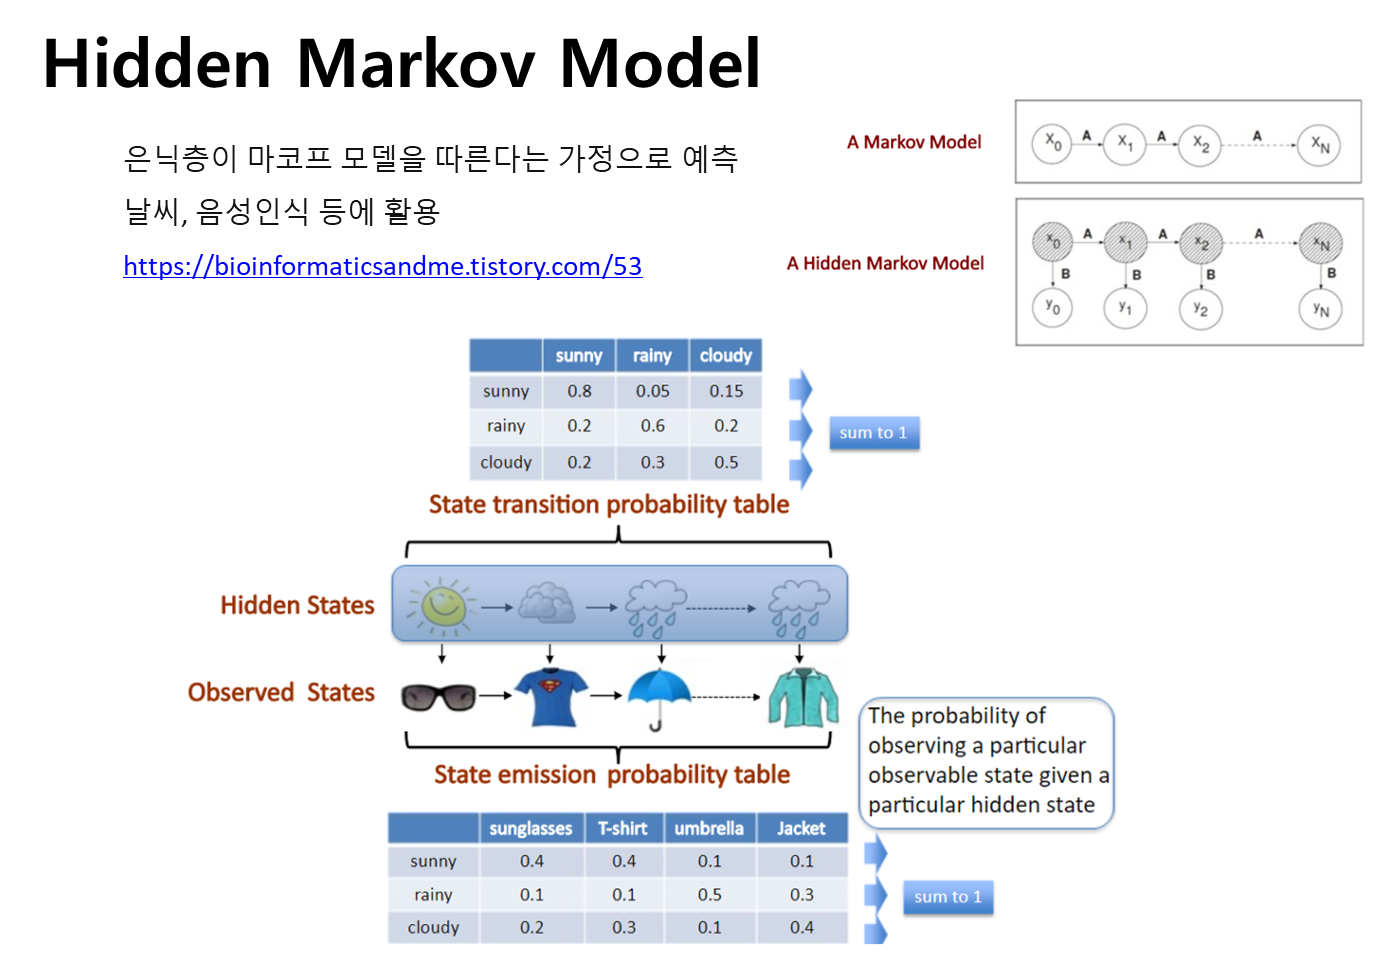

In [ ]:
!pip install hmmlearn

In [ ]:
# prompt: HMM 모델을 활용해 데이터를 분석하고 결과를 표시하는 코드

from hmmlearn import hmm


data = np.array([0])
A_corr = 0.5

for i in range(99):
  data = np.append(data, data[-1] * A_corr + np.random.normal(0, 1, 1))


# Create and train the HMM model
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100) # Adjust n_components as needed
model.fit(data.reshape(-1, 1))  # Reshape data for HMM input

# Predict hidden states
hidden_states = model.predict(data.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(hidden_states, label='Hidden States', alpha=0.7)
plt.legend()
plt.title('Hidden Markov Model Analysis')
plt.xlabel('Time Step')
plt.ylabel('Value / Hidden State')
plt.show()

# Further analysis (optional):
print("Model parameters:")
print("Means:", model.means_)
print("Covariances:", model.covars_)
print("Transition Matrix:", model.transmat_)


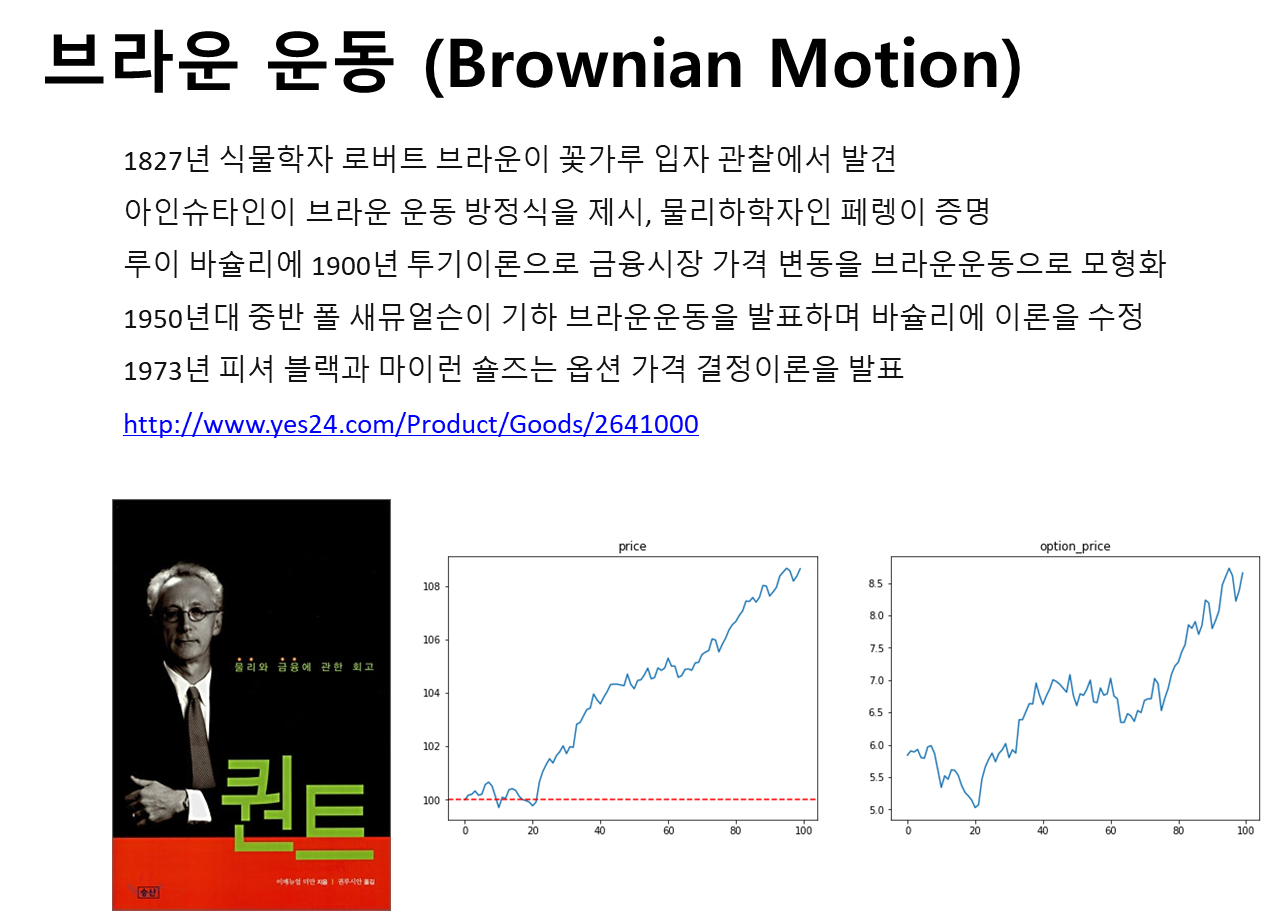

In [ ]:
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=stochastic73&logNo=221553746353
import scipy.stats as stat

# S 기초자산 가격
# K 행사가
# T 만기
# r 무위험이자율
# sigma 기초자산의 연간 변동성

def BS_model(S, K , T, r, sigma, option_type):
  d1 = (np.log(S / K ) + (r + 0.5 * sigma ** 2 ) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)

  if option_type == 'call':
    V = S * stat.norm.cdf(d1) - K * np.exp(-r * T ) * stat.norm.cdf(d2)
  else :
    V = K * np.exp(-r* T) * stat.norm.cdf(-d2) - S * stat.norm.cdf(-d1)

  return V

In [ ]:
#확률보행과정 (Random Walr Process)

K = 100
sigma = 0.25
rate = 0.03
r = np.log(1.05)
t = 1 / 365

data = np.array([100])
option_price = np.array([BS_model(100, K, t * 99, r, sigma, 'call')])

for i in range(99):
  data = np.append(data, data[-1] + np.random.normal(0, sigma, 1))
  option_price = np.append(option_price, BS_model(data[-1], K, t * (98 - i), r, sigma, 'call'))


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.plot(data)
plt.title('price')
ax.axhline(100, 0, 100, color='red', linestyle='--')

ax = fig.add_subplot(1,2,2)
ax.plot(option_price)
plt.title('option_price')

plt.show()


In [ ]:
!pip install prophet

In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=67300accb9775" -O "apt.csv"


In [ ]:
import pandas as pd
data = pd.read_csv("apt.csv", sep=",", encoding="cp949", dtype="str")
data["거래금액(만원)"] = data["거래금액(만원)"].str.replace(",", "").astype("int64")
data["전용면적(㎡)"] = data["전용면적(㎡)"].astype("float64")

data = data[(data["전용면적(㎡)"] > 60) & (data["전용면적(㎡)"] < 120)]

data["unitprice"] = data["거래금액(만원)"]*10000 / data["전용면적(㎡)"]
data['date'] = pd.to_datetime(data['계약년월'] + data['계약일'], format='%Y%m%d')
data  = data[["date", "unitprice"]]



plt.figure(figsize=(10, 6))
plt.scatter(data['date'], data['unitprice'])
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title('Unit Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: facebook에서 제공하는 prophet으로 위 data를 분석하여 출력

from prophet import Prophet

# Prepare the data for Prophet
data_prophet = data.rename(columns={'date': 'ds', 'unitprice': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(data_prophet)

# Create future dates for prediction
future = model.make_future_dataframe(periods=365)  # Predict for the next year

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)

# Plot the components of the forecast
fig2 = model.plot_components(forecast)